In [8]:
import tensorflow as tf 
from tensorflow.python.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D
from tensorflow.keras.datasets import mnist #this library contains a lot of ML datasets including the MNIST one
from tensorflow.python.keras.models import Sequential
import pickle #pickle is a library that helps us save a lot of different types of data - anything ranging from Pandas dataframes to TensorFlow models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


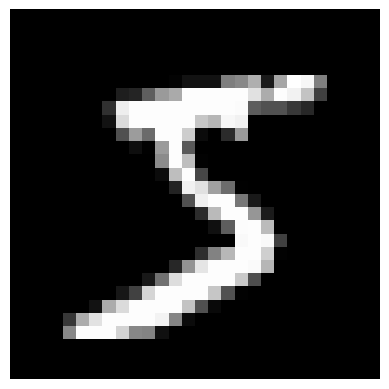

Valor mínimo: 0
Valor máximo: 255


In [9]:
#importar os dados
input_shape = (28, 28, 1)
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
#inpeccionar os dados de treino
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)
plt.imshow(train_data[0], cmap='gray')
plt.axis('off')  # Desabilitar os eixos
plt.show()
train_labels[0]

#preparação dos dados para a CNN
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)
min_value = np.min(train_data[0])
max_value = np.max(train_data[0])
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
#normalizar os dados
train_data /= 255
test_data /= 255

In [10]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5,5), input_shape = input_shape))# Input layer
model.add(AveragePooling2D(pool_size=(2, 2)))# downsizing images
model.add(Conv2D(16, kernel_size=(5,5), input_shape = input_shape))# Input layer
model.add(AveragePooling2D(pool_size=(2, 2)))# downsizing images
model.add(Flatten()) #transformar a matriz de 16 camadas em um vector unidimensional
model.add(Dense(120, activation=tf.nn.relu, use_bias=True)) # Adicionar 120 neuroneos com função de activação relu
model.add(Dropout(0.5)) #Implementing dropout regularization with p = 0.5
model.add(Flatten()) #transformar a matriz de 16 camadas em um vector unidimensional
model.add(Dense(84, activation=tf.nn.relu, use_bias=True)) # Adicionar 84 neuroneos com função de activação relu
model.add(Dropout(0.5)) #Implementing dropout regularization with p = 0.5
model.add(Dense(10,activation=tf.nn.softmax)) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_data,y=train_labels, epochs=12,batch_size=32)

2023-06-19 19:08:00.832230: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/12
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4312 - accuracy: 0.8695
Epoch 2/12
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2320 - accuracy: 0.9304
Epoch 3/12
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1942 - accuracy: 0.9427
Epoch 4/12
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1725 - accuracy: 0.9481
Epoch 5/12
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1605 - accuracy: 0.9524
Epoch 6/12
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1490 - accuracy: 0.9546
Epoch 7/12
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1399 - accuracy: 0.9578
Epoch 8/12
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1331 - accuracy: 0.9597
Epoch 9/12
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1281 - accuracy: 0.9613
Epoch 10/12
1875/1875 [==============================] - 18s 10m

In [12]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0721 - accuracy: 0.9767

Test accuracy: 0.9767000079154968


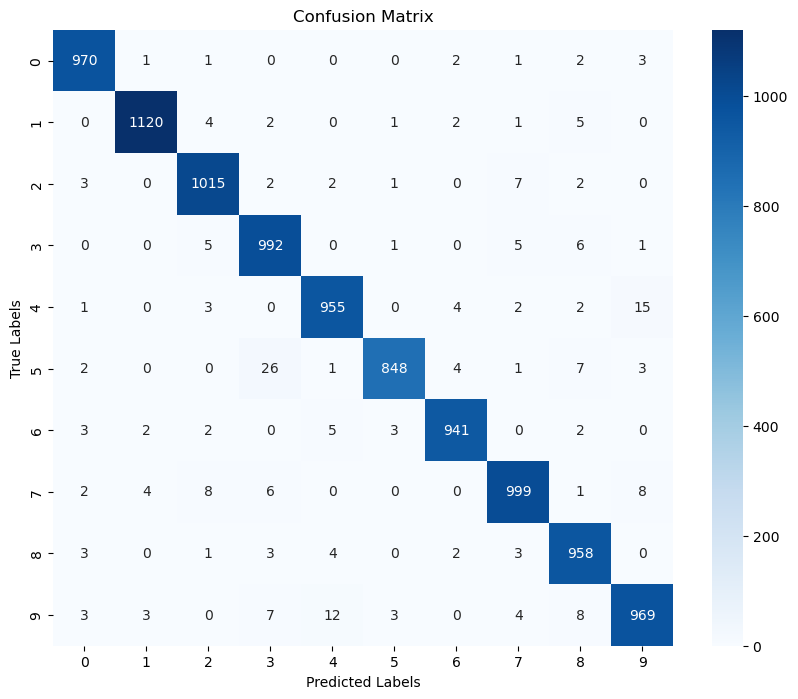

In [13]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5,5),activation='relu',input_shape = input_shape))# Input layer
model.add(MaxPooling2D(pool_size=(2, 2)))# downsizing images
model.add(Conv2D(16, kernel_size=(5,5),activation='relu',input_shape = input_shape))# Input layer
model.add(MaxPooling2D(pool_size=(2, 2)))# downsizing images
model.add(Flatten()) #transformar a matriz de 16 camadas em um vector unidimensional
model.add(Dense(256, activation=tf.nn.relu, use_bias=True)) # Adicionar 120 neuroneos com função de activação relu
model.add(Flatten()) #transformar a matriz de 16 camadas em um vector unidimensional
model.add(Dense(10,activation=tf.nn.softmax)) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_data,y=train_labels, epochs=20,batch_size=80)

Epoch 1/20
750/750 [==============================] - 9s 11ms/step - loss: 0.2398 - accuracy: 0.9283
Epoch 2/20
750/750 [==============================] - 8s 11ms/step - loss: 0.0666 - accuracy: 0.9790
Epoch 3/20
750/750 [==============================] - 8s 11ms/step - loss: 0.0474 - accuracy: 0.9854
Epoch 4/20
750/750 [==============================] - 8s 11ms/step - loss: 0.0355 - accuracy: 0.9892
Epoch 5/20
750/750 [==============================] - 9s 11ms/step - loss: 0.0289 - accuracy: 0.9907
Epoch 6/20
750/750 [==============================] - 9s 11ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 7/20
750/750 [==============================] - 8s 11ms/step - loss: 0.0204 - accuracy: 0.9935
Epoch 8/20
750/750 [==============================] - 8s 11ms/step - loss: 0.0165 - accuracy: 0.9944
Epoch 9/20
750/750 [==============================] - 8s 11ms/step - loss: 0.0139 - accuracy: 0.9954
Epoch 10/20
750/750 [==============================] - 9s 11ms/step - loss: 0.0136 - accura

In [16]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0360 - accuracy: 0.9919

Test accuracy: 0.9919000267982483


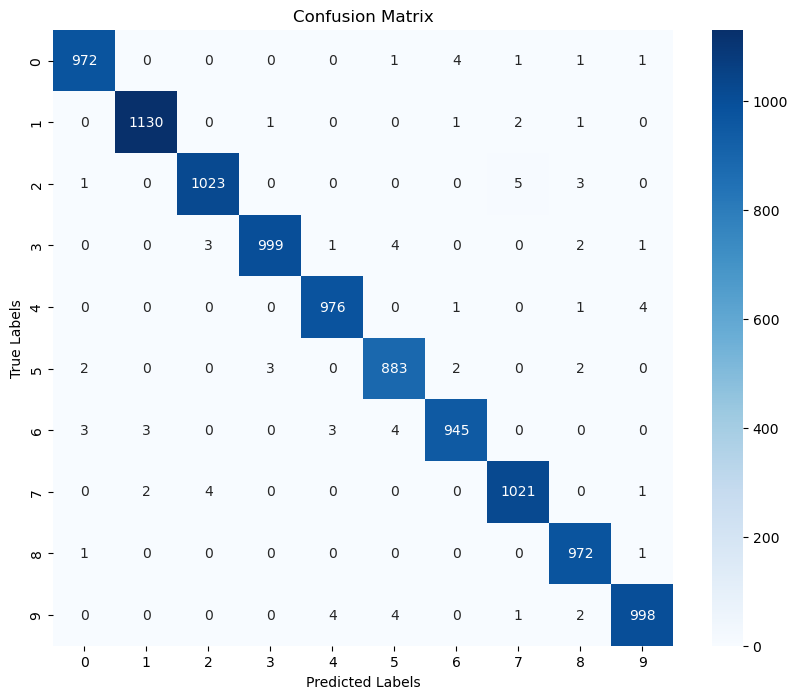

In [17]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

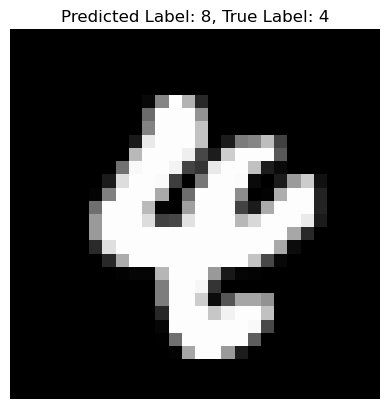

In [18]:
# Encontrar índices das amostras classificadas incorretamente
incorrect_indices = np.where(test_labels != predicted_labels)[0]

# Escolher um índice aleatório dos exemplos classificados incorretamente
random_index = np.random.choice(incorrect_indices)

# Obter a imagem e o rótulo correspondentes ao índice escolhido
incorrect_image = test_data[random_index]
incorrect_label = test_labels[random_index]

# Mostrar a imagem e o rótulo correspondentes
plt.imshow(incorrect_image, cmap='gray')
plt.title(f'Predicted Label: {predicted_labels[random_index]}, True Label: {incorrect_label}')
plt.axis('off')
plt.show()